# Time Series Modeling Exercises

In [109]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import explore
import acquire
import prepare

from math import sqrt

from statsmodels.tsa.api import Holt

### 1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

In [4]:
df = prepare.wrangle_sales_data()

In [7]:
explore.find_range(df)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00


In [32]:
df = df.resample("W").sum()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2013-01-06 00:00:00+00:00 to 2015-12-27 00:00:00+00:00
Freq: W-SUN
Data columns (total 2 columns):
sale_amount    156 non-null float64
sales_total    156 non-null float64
dtypes: float64(2)
memory usage: 3.7 KB


In [34]:
train = df[:"2015"][["sale_amount", "sales_total"]]
validate = df["2016"][["sale_amount", "sales_total"]]
test = df["2017"][["sale_amount", "sales_total"]]

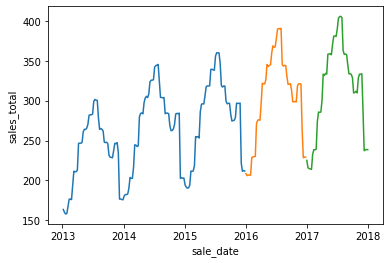

In [35]:
sns.lineplot(data=train, x=train.index, y= "sales_total")
sns.lineplot(data=validate, x=validate.index, y= "sales_total")
sns.lineplot(data=test, x=test.index, y= "sales_total")

### 2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
    * Simple Average
    * Moving Average
    * Holt's Linear Trend Model
    * Based on previous year/month/etc., this is up to you.
    
#### Goal: Predict sales volume

In [70]:
# Create a baseline using the last observed value

items = train["sale_amount"][-1:][0]
dollars = round(train["sales_total"][-1:][0], 2)

predictions = pd.DataFrame({
"actual": validate.sales_total, 
"last_observed_value": [dollars]},
index = validate.index)

In [71]:
predictions

,actual,last_observed_value
sale_date,,
2016-01-03 00:00:00+00:00,208.569520,211.8
2016-01-10 00:00:00+00:00,206.023826,211.8
2016-01-17 00:00:00+00:00,207.049734,211.8
2016-01-24 00:00:00+00:00,206.552751,211.8
2016-01-31 00:00:00+00:00,206.832960,211.8
2016-02-07 00:00:00+00:00,228.868357,211.8
2016-02-14 00:00:00+00:00,229.556849,211.8
2016-02-21 00:00:00+00:00,229.883483,211.8
2016-02-28 00:00:00+00:00,230.185566,211.8


In [97]:
def print_rmse(model, predictions=predictions):
    print(f'RMSE = {round(sqrt(mean_squared_error(predictions.actual, predictions[model])), 0)}')

In [79]:
print(f'RMSE = {round(sqrt(mean_squared_error(predictions.actual, predictions.last_observed_value)), 0)}')

RMSE = 108.0


In [91]:
def plot_prediction(model, target_variable, train=train, validate=validate, predictions=predictions):
    plt.figure(figsize = (20, 9))

    sns.lineplot(data=train, x=train.index, y=target_variable)
    sns.lineplot(data=validate, x=validate.index, y=target_variable)
    sns.lineplot(data=predictions, x=predictions.index, y=model)

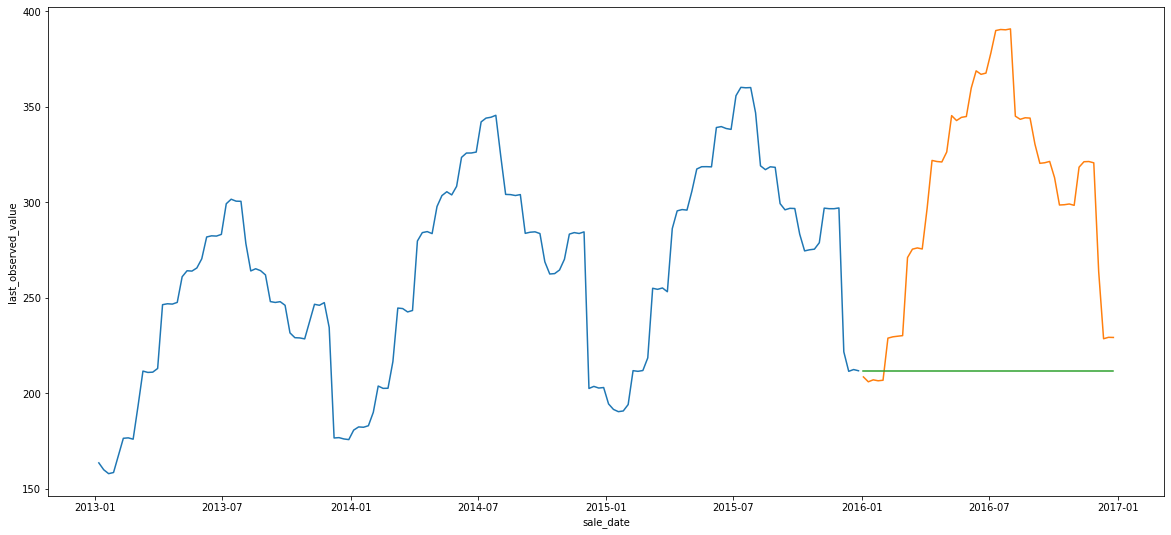

In [92]:
plot_prediction("last_observed_value", "sales_total")

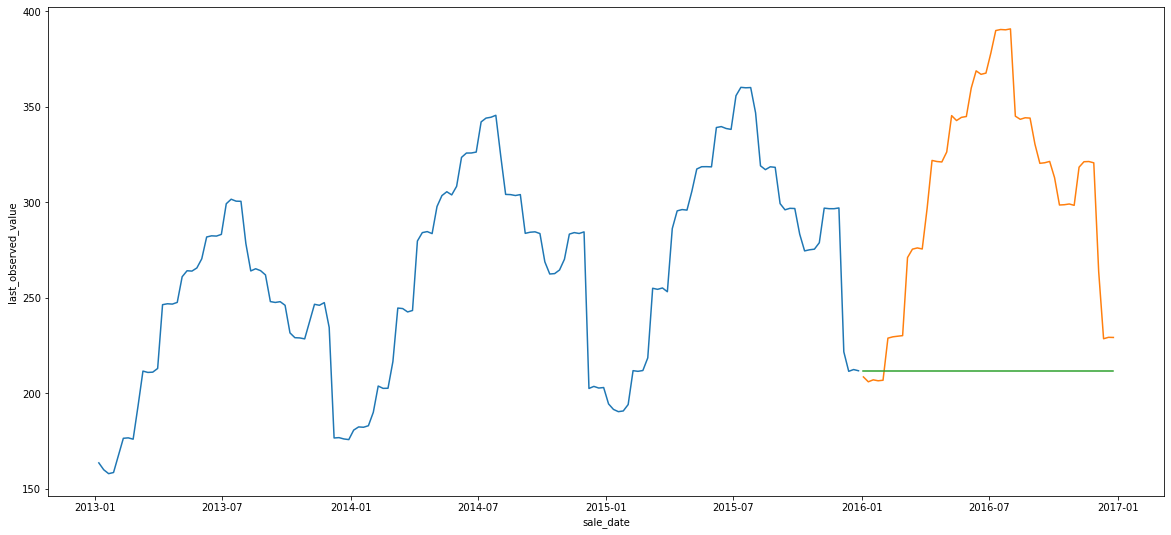

In [86]:
plt.figure(figsize = (20, 9))

sns.lineplot(data=train, x=train.index, y="sales_total")
sns.lineplot(data=validate, x=validate.index, y="sales_total")
sns.lineplot(data=predictions, x=predictions.index, y="last_observed_value")

----------

In [95]:
# Simple Average 

dollas = round(train["sales_total"].mean(), 2)

predictions["simple_average"] = dollars

In [98]:
print_rmse("simple_average")

RMSE = 108.0


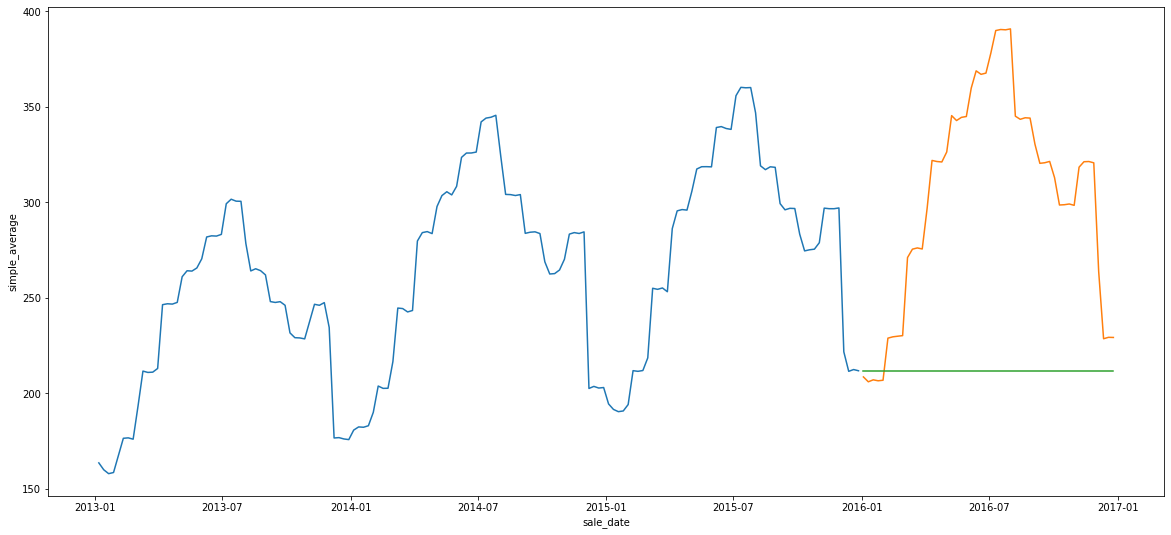

In [99]:
plot_prediction("simple_average", "sales_total")

---------

In [103]:
# Moving average

# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

dollars = round(train["sales_total"].rolling(30).mean().iloc[-1], 2)

predictions["moving_average"] = dollars

In [105]:
print_rmse("moving_average")

RMSE = 55.0


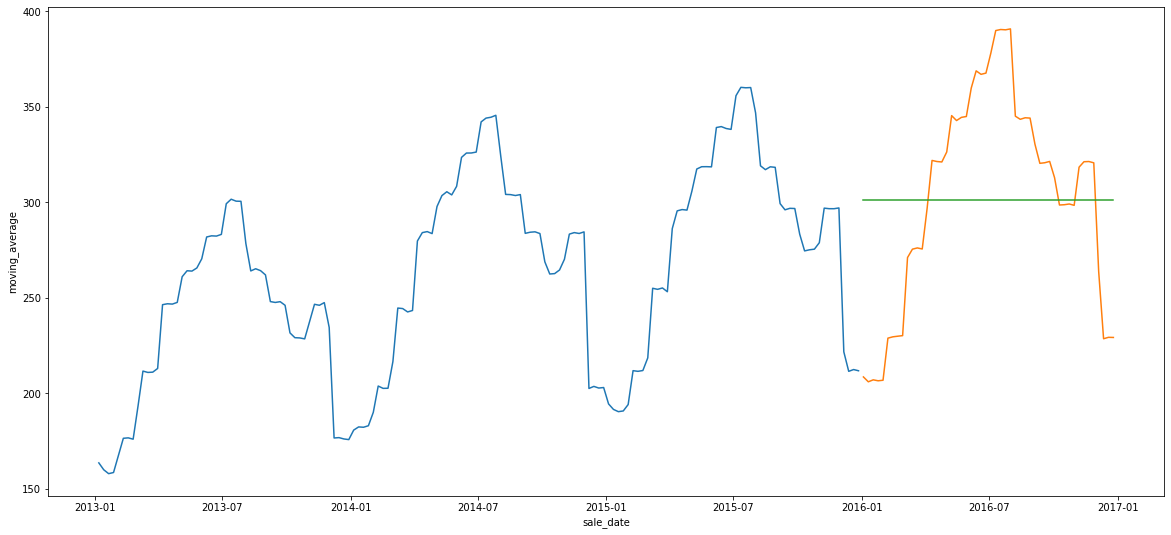

In [107]:
plot_prediction("moving_average", "sales_total")

-------

In [147]:
# Holt's Linear Trend

# Create model object
model = Holt(train["sales_total"], exponential = True)

# Fit model 
model = model.fit(smoothing_level = .1, smoothing_slope=.1, optimized = False)

# Create predictions
y_pred = model.predict(start=validate.index[0], end=validate.index[-1])

# Store the predictions

predictions["holt_prediction"] = y_pred

In [149]:
print_rmse("holt_prediction")

RMSE = 146.0


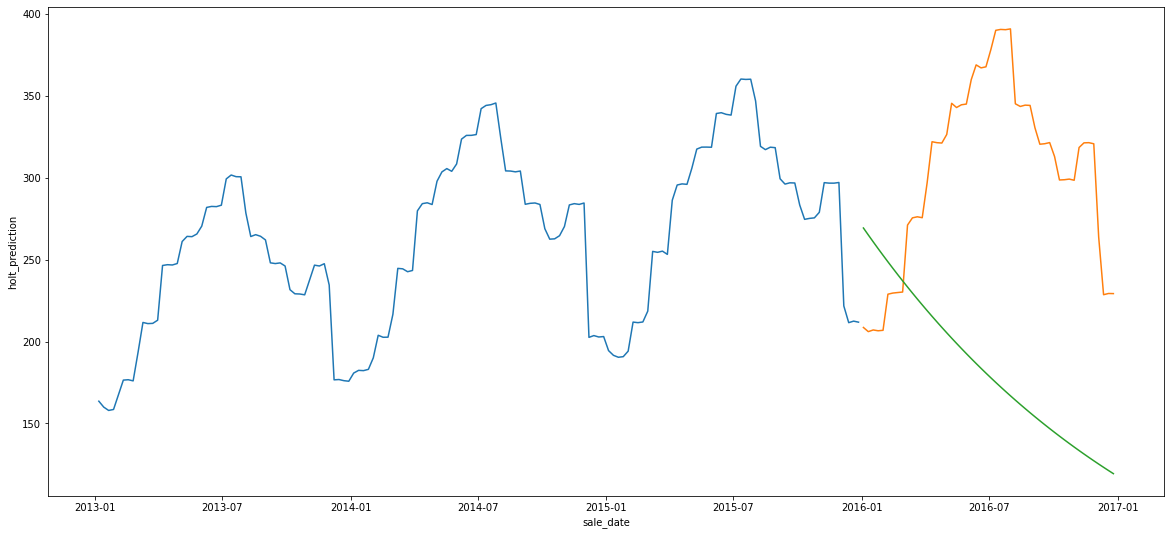

In [150]:
plot_prediction("holt_prediction", "sales_total")

------

In [202]:
explore.find_range(train)

Date Range: 2013-01-06 00:00:00+00:00 to 2015-12-27 00:00:00+00:00


In [189]:
train['2013-01-06':'2015-12-27'].sales_total.diff(365).mean()

nan

In [225]:
# predict based on previous cycle

y_pred = train['2015'].sales_total + train.sales_total.diff(52).mean()

y_pred.index = validate.index

In [226]:
train.diff(52).mean()

sale_amount     4.358410
sales_total    23.433974
dtype: float64

In [227]:
y_pred

sale_date
2016-01-03 00:00:00+00:00    217.880165
2016-01-10 00:00:00+00:00    215.006339
2016-01-17 00:00:00+00:00    213.825771
2016-01-24 00:00:00+00:00    214.195074
2016-01-31 00:00:00+00:00    217.550405
2016-02-07 00:00:00+00:00    235.279774
2016-02-14 00:00:00+00:00    234.936751
2016-02-21 00:00:00+00:00    235.355402
2016-02-28 00:00:00+00:00    241.977391
2016-03-06 00:00:00+00:00    278.409848
2016-03-13 00:00:00+00:00    277.848491
2016-03-20 00:00:00+00:00    278.565182
2016-03-27 00:00:00+00:00    276.589545
2016-04-03 00:00:00+00:00    309.624137
2016-04-10 00:00:00+00:00    318.920054
2016-04-17 00:00:00+00:00    319.595125
2016-04-24 00:00:00+00:00    319.319445
2016-05-01 00:00:00+00:00    329.215171
2016-05-08 00:00:00+00:00    340.827837
2016-05-15 00:00:00+00:00    342.022174
2016-05-22 00:00:00+00:00    342.048191
2016-05-29 00:00:00+00:00    341.955508
2016-06-05 00:00:00+00:00    362.533311
2016-06-12 00:00:00+00:00    363.024022
2016-06-19 00:00:00+00:00    3

In [228]:
predictions["previous_cycle"] = y_pred

In [229]:
predictions

,actual,last_observed_value,simple_average,moving_average,holt_prediction,previous_cycle
sale_date,,,,,,
2016-01-03 00:00:00+00:00,208.569520,211.8,211.8,301.05,269.255594,217.880165
2016-01-10 00:00:00+00:00,206.023826,211.8,211.8,301.05,264.995654,215.006339
2016-01-17 00:00:00+00:00,207.049734,211.8,211.8,301.05,260.803111,213.825771
2016-01-24 00:00:00+00:00,206.552751,211.8,211.8,301.05,256.676899,214.195074
2016-01-31 00:00:00+00:00,206.832960,211.8,211.8,301.05,252.615968,217.550405
2016-02-07 00:00:00+00:00,228.868357,211.8,211.8,301.05,248.619286,235.279774
2016-02-14 00:00:00+00:00,229.556849,211.8,211.8,301.05,244.685836,234.936751
2016-02-21 00:00:00+00:00,229.883483,211.8,211.8,301.05,240.814619,235.355402
2016-02-28 00:00:00+00:00,230.185566,211.8,211.8,301.05,237.004648,241.977391


### Evaluate

In [210]:
def evaluate(model):
    # compute RMSE of predicted value vs. actual value
    mse = metrics.mean_squared_error(predictions.actual, predictions[model])
    rmse = round(math.sqrt(mse),0)
    return rmse

In [230]:
scores = pd.DataFrame()
for col in predictions:
    rmse = evaluate(col)
    print(f'{col} rmse = {rmse}')

actual rmse = 0.0
last_observed_value rmse = 108.0
simple_average rmse = 108.0
moving_average rmse = 55.0
holt_prediction rmse = 146.0
previous_cycle rmse = 6.0


In [175]:
import sklearn

In [231]:
rmse = predictions.apply(lambda col: sqrt(sklearn.metrics.mean_squared_error(predictions.actual, col)))

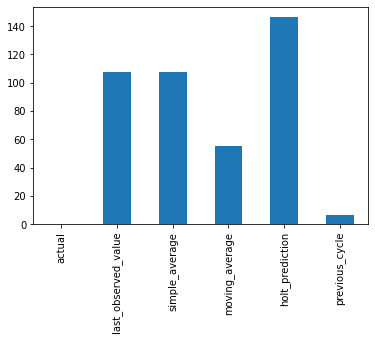

In [232]:
rmse.plot.bar()

### Optional: Using store item demand

### 1. Predict 2018 total monthly sales for a single store and/or item by creating a model using prophet.

### 2. Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).

### 3. Plot the 2018 monthly sales predictions.